In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

import pandas as pd

from statsmodels.api import OLS, add_constant, graphics
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

In [4]:
with pd.HDFStore('data.h5') as store:
    data = (store['btc_1d_data']
            .dropna()
            .drop(['open', 'close', 'low', 'high'], axis=1))

In [5]:
data.info(null_counts=True)

TypeError: info() got an unexpected keyword argument 'null_counts'

In [7]:
y = data.filter(like='target')
X = data.drop(y.columns, axis=1)
X = X.drop(['volume'], axis=1)

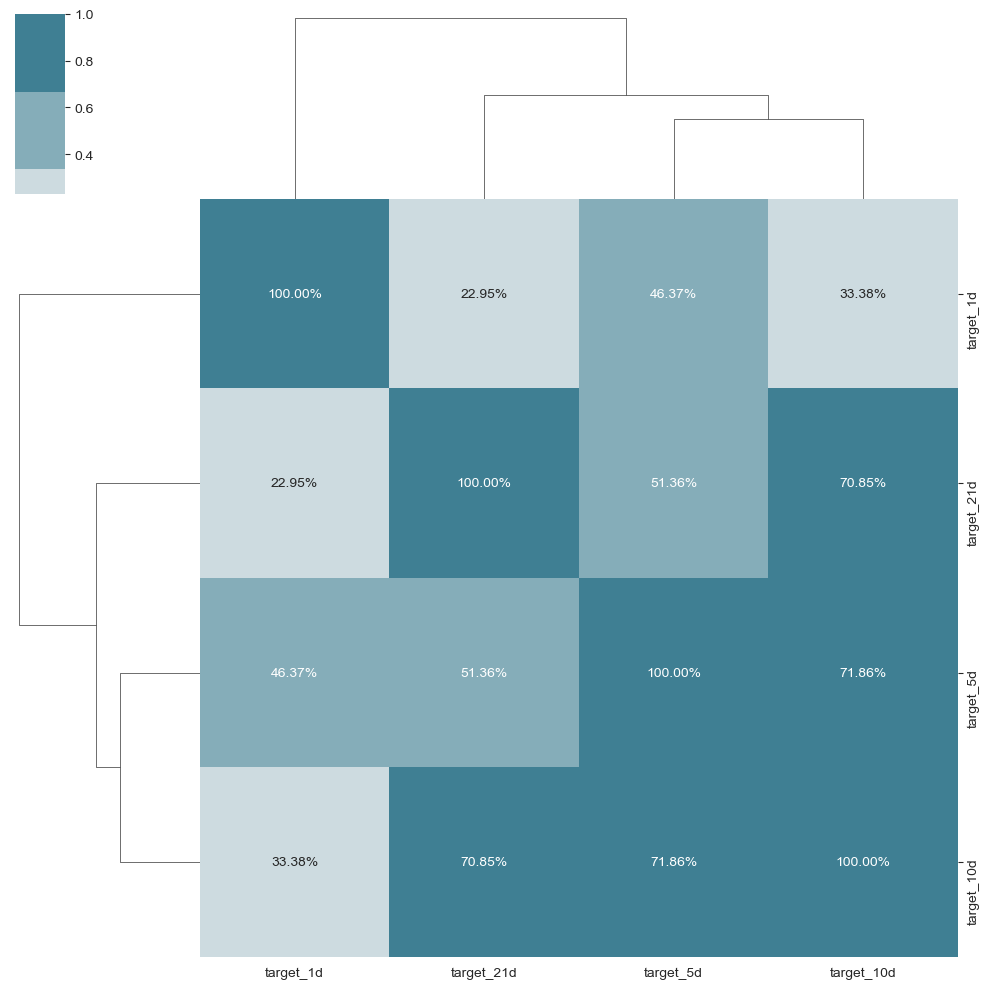

In [8]:
sns.clustermap(y.corr(), cmap=sns.diverging_palette(h_neg=20, h_pos=220), center=0, annot=True, fmt='.2%');

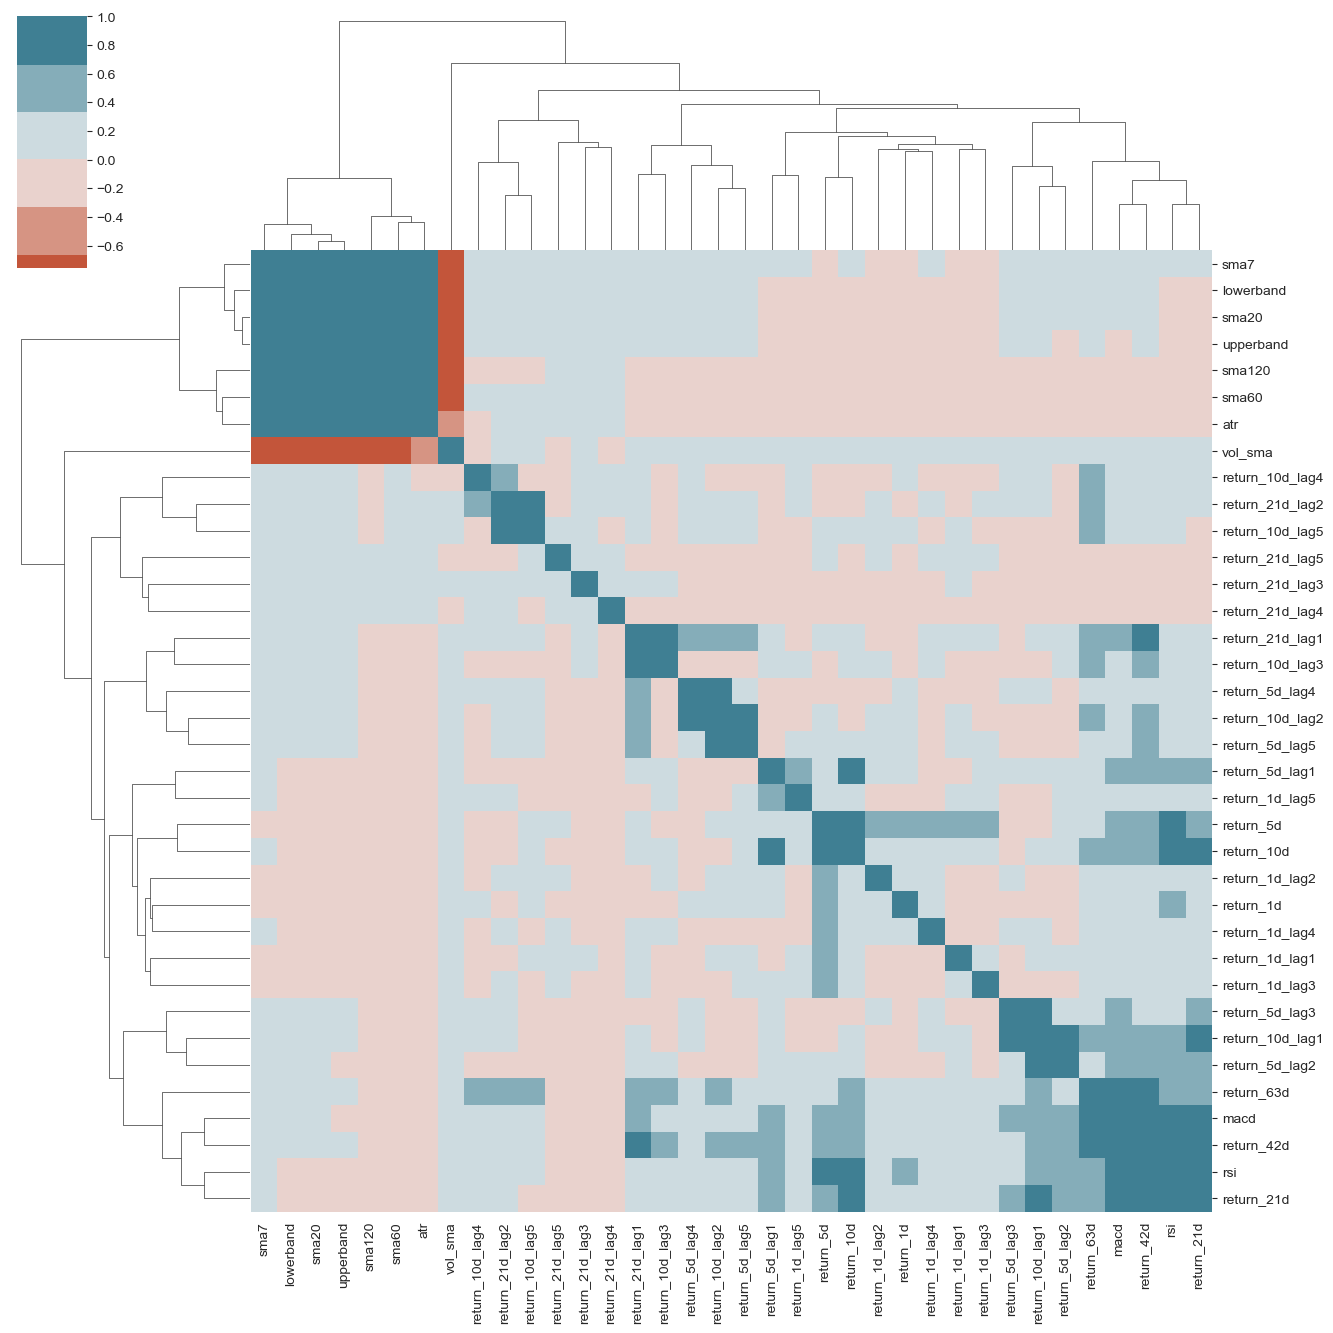

In [9]:
sns.clustermap(X.corr(), cmap=sns.diverging_palette(h_neg=20, h_pos=220), center=0);
plt.gcf().set_size_inches((14, 14))

In [18]:
X = (X.transform(lambda x: (x - x.mean()) / x.std())
    .fillna(0))

In [19]:
target = 'target_1d'
model = OLS(endog=y[target], exog=add_constant(X))
trained_model = model.fit()

In [20]:
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:              target_1d   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.029
Date:                Thu, 21 Mar 2024   Prob (F-statistic):              0.424
Time:                        00:36:57   Log-Likelihood:                 1508.0
No. Observations:                 764   AIC:                            -2942.
Df Residuals:                     727   BIC:                            -2770.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0004      0.001     

In [13]:
target = 'target_5d'
model = OLS(endog=y[target], exog=add_constant(X))
trained_model = model.fit()

In [14]:
print(trained_model.summary())

                            OLS Regression Results                            
Dep. Variable:              target_5d   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     2.679
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           6.90e-07
Time:                        17:30:55   Log-Likelihood:                 2156.9
No. Observations:                 764   AIC:                            -4240.
Df Residuals:                     727   BIC:                            -4068.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0009      0.001     

In [15]:
preds = trained_model.predict(add_constant(X))
residuals = y[target] - preds

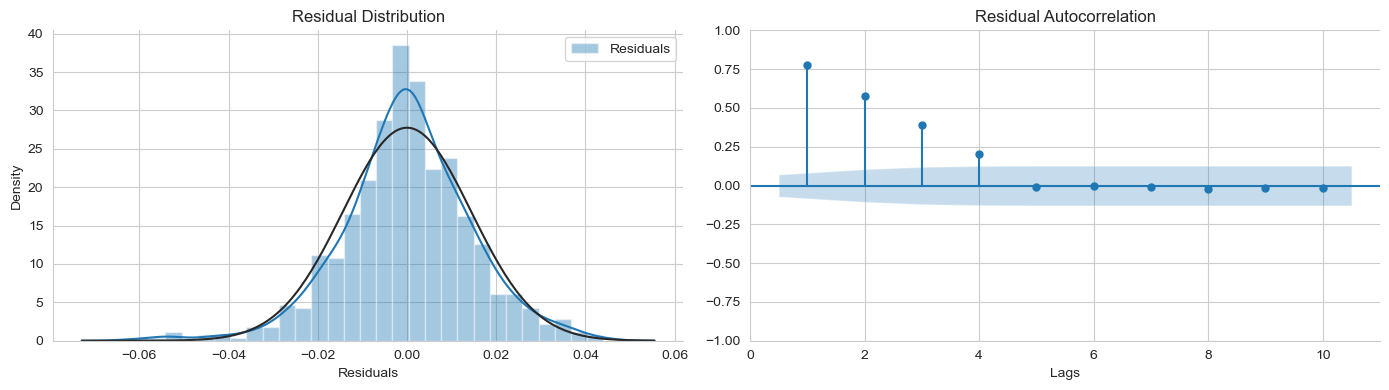

In [21]:
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
sns.distplot(residuals, fit=norm, ax=axes[0], axlabel='Residuals', label='Residuals')
axes[0].set_title('Residual Distribution')
axes[0].legend()
plot_acf(residuals, lags=10, zero=False, ax=axes[1], title='Residual Autocorrelation')
axes[1].set_xlabel('Lags')
sns.despine()
fig.tight_layout()

In [17]:
# data.index.names = ['symbol', 'date'] symbol을 첫번째 index로 묶고, 그 다음 date르 두번째 index로 묶는다는 뜻
data = data.drop([c for c in data.columns if 'lag' in c], axis=1)